# Dataset: California Housing Prices

O desafio consiste em predizer o preço da habitação a partir de informações do senso de California de 1990.

As colunas do dataset são as seguintes:
- **longitude**: Longitude geográfica.
- **latitude**: Latitude geográfica.
- **housing_median_age**: Idade média das habitações na região, medida em anos.
- **total_rooms**: Número total de cômodos em todas as unidades habitacionais da área analisada.
- **total_bedrooms**: Número total de quartos em todas as unidades habitacionais da área analisada.
- **population**: População total residente na área geográfica correspondente ao imóvel.
- **households**: Número total de domicílios na região, representando unidades familiares ou habitacionais.
- **median_income**: Renda mediana dos moradores da região, expressa em múltiplos de 1.000 dólares.
- **median_house_value**: Valor mediano das residências na área, representado em dólares.
- **ocean_proximity**: Proximidade da localização em relação ao oceano, categorizada por rótulos como "Perto da Baía" (Near Bay), "Perto do Oceano" (Near Ocean), "Interior" (Inland), entre outros.

O candidato deve apresentar um modelo que faça a predição do preço da habitação (o candidato é livre para entregar mais de um modelo).

Esse arquivo é um template para desenvolver o modelo, sinta-se a vontade para modificá-lo como preferir.

In [233]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Para reprodutibilidade use uma seed específica para gerar números aleatórios
Abaixo algumas formas de definir a seed aleatória de alguns frameworks populares, caso não vá usar algum sinta-se a vontade para excluir

In [234]:
random_seed = 42

In [235]:
data = pd.read_csv('housing.csv')

# Análise e visualização dos dados
Espaço reservado para uma análise mais a fundo dos dados e para apresentação de alguns plots caso o candidato julgue necessário

In [236]:
data.shape

(20640, 10)

In [237]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [238]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Pré-processamento

In [239]:
encoder = LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])
data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [240]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f'Coluna {i} tem {data[i].isnull().sum()} valores nulos')

Coluna total_bedrooms tem 207 valores nulos


In [241]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)
data['total_bedrooms'].isnull().sum()

C:\Users\Max\AppData\Local\Temp\ipykernel_12824\2102607351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)


0

In [242]:
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [243]:
Scaler = StandardScaler()
x = Scaler.fit_transform(x)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)
y_train_scaled = np.array(Scaler.fit_transform(pd.DataFrame(y_train)))
y_test_scaled = np.array(Scaler.fit_transform(pd.DataFrame(y_test)))

In [264]:
model = RandomForestRegressor(n_estimators=300, max_depth=30, random_state=random_seed)
model.fit(x_train_scaled, y_train_scaled)
y_pred = model.predict(x_test_scaled)

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [265]:
y_pred_descaled = Scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_descaled = Scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

In [266]:
mse = mean_squared_error(y_test_descaled, y_pred_descaled)
r2 = r2_score(y_test_descaled, y_pred_descaled)
mape = mean_absolute_percentage_error(y_test_descaled, y_pred_descaled)
rmse = np.sqrt(mse)

In [269]:
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'Acurácia: {1-mape}')

MSE: 2471570833.0691247
R2: 0.8113893544603934
MAPE: 0.1756181116328716
RMSE: 49714.895484845634
Acurácia: 0.8243818883671283


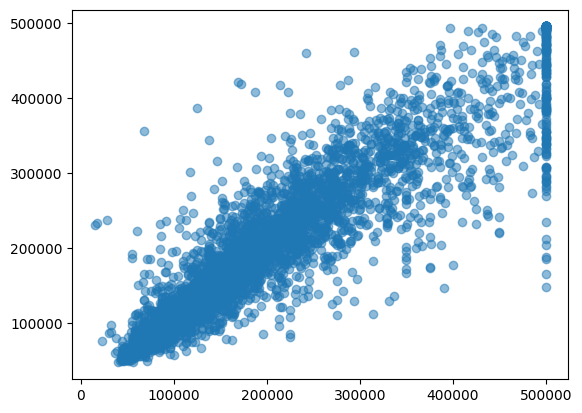

In [268]:
plt.scatter(y_test_descaled, y_pred_descaled, alpha=0.5)